Importez les librairies numpy, matplotlib, pandas, seaborn et sklearn. De sklearn.datasets importez
load breast cancer, et utilisez cette fonction pour charger le jeu de donnees.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer

1. Une fois les donnees chargees, regardez l’objet recu et sa structure, ainsi que comment est constitue
un DataFrame (une des structures de base de pandas. Vous pouvez lire le docstring sur un objet
ou une classe via le point d’interrogation ”?” ou la fonction help. Creez ensuite un DataFrame
contenant les donnees chargees.

In [ ]:
breast_cancer = load_breast_cancer(as_frame=True)
df = pd.DataFrame(np.c_[breast_cancer['data'],breast_cancer['target']],columns = np.append(breast_cancer['feature_names'], ['target']))
df.head()



mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [ ]:
df.shape

(569, 31)

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

2. Tracez les donnees par paire de dimension pour les dimensions 1 a 4 via la fonction pairplot de
seaborn (la methode de DataFrame iloc peut vous permettre de selectionner les dimensions qui
vous interessent).

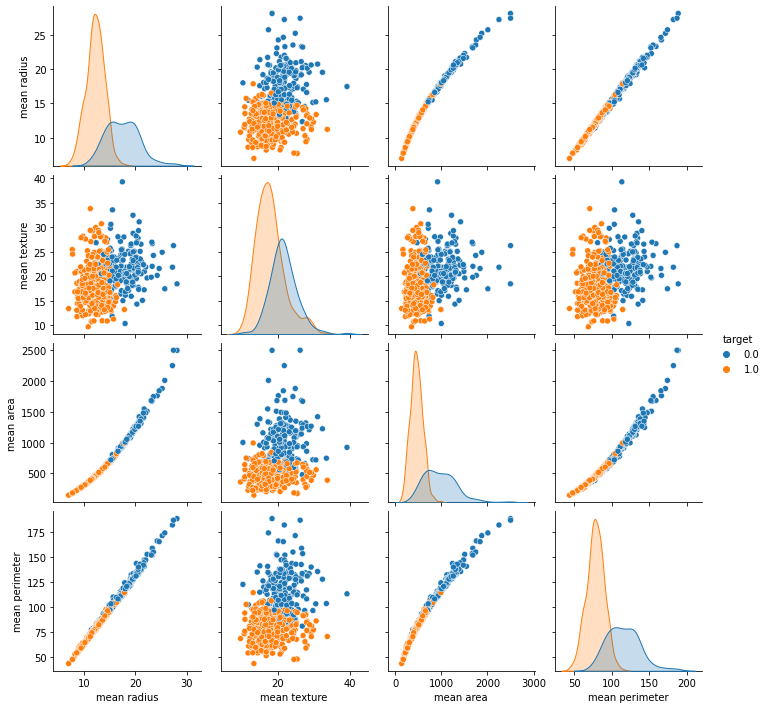

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter'])

Les points bleus indiquent un cas malin qui met la vie en danger et les points orange représentent un cas bénin. Pour montrer la corrélation entre les caractéristiques, nous pourrions utiliser la carte thermique de Seaborn.

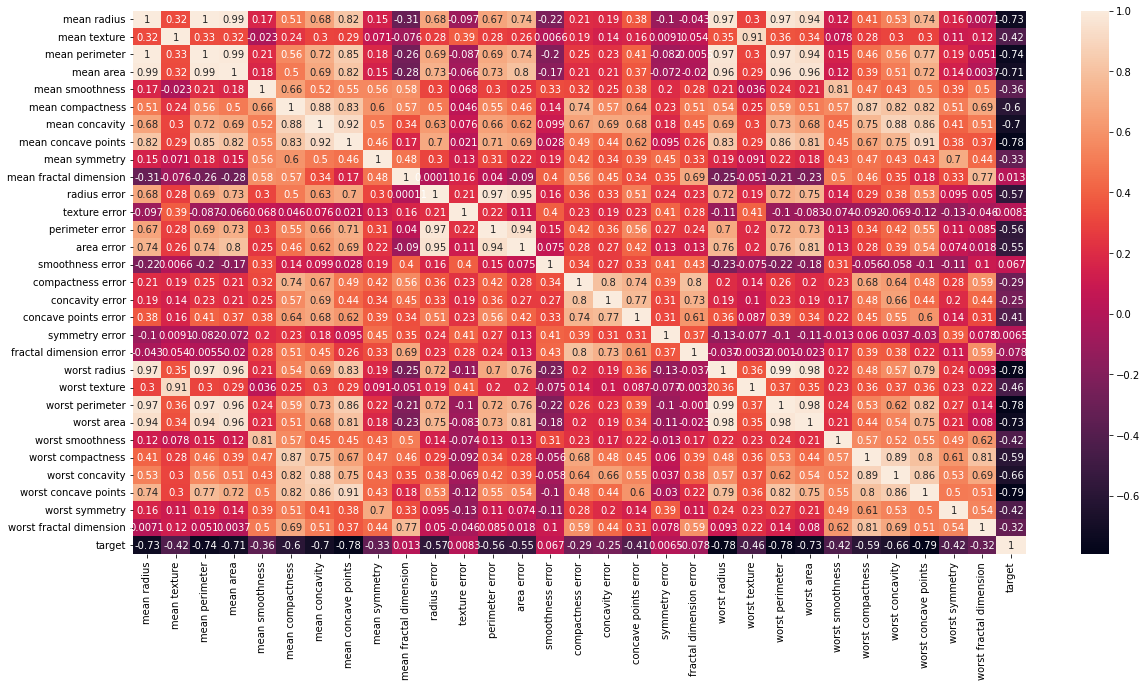

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

nous pouvons voir que toutes les valeurs sont comprises entre 0 et 1. Plus la valeur est élevée, plus la corrélation entre ces deux caractéristiques est élevée.

3. Separez les donnees en une base d’apprentissage et une base de test. Faites le d’abord sans
utiliser de fonction faite pour. Par la suite, vous pourrez utiliser la fonction train test split de
sklearn.model selection.

In [ ]:
x = df.drop(['target'], axis=1)
x.shape

(569, 30)

In [ ]:
y = df['target']
y.shape

(569,)

In [ ]:
#exemple de decoupage non malin ;-p
N=df.shape[0]
Napp=(int)(N/2)
print(N)
print(Napp)
dataEx=df.iloc[:Napp,:]
dataEx.head()
Nex=dataEx.shape[0]
print(Nex)
dataTest=df.iloc[Napp:N,:]
dataTest.describe()
Ntest=dataTest.shape[0]
print(Ntest)

569
284
284
285


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
X_train.shape

(455, 30)

4. Utilisez le DecisionTreeClassifier de sklearn.tree pour apprendre sur vos donnees d’entraınement.
Regardez la doc de l’objet avant de l’utiliser, prenez le critere de selection ”entropy” mais laissez
les autres param`etres `a leurs valeurs par d´efaut.

In [ ]:
#import library

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clt =DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.04)
clt.fit(X_train,y_train)
prediction_test = clt.predict(X_test)
prediction_train=clt.predict(X_train)


In [ ]:
print("taux de reconnaissance en apprentissage -donnee train- :", accuracy_score(y_train, prediction_train))
print("taux de reconnaissance en généralisation -donnee test- :", accuracy_score(y_test,prediction_test))

taux de reconnaissance en apprentissage -donnee train- : 0.945054945054945
taux de reconnaissance en généralisation -donnee test- : 0.9035087719298246


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_train, prediction_train))
print(confusion_matrix(y_test, prediction_test))

[[147  17]
 [  8 283]]
[[42  6]
 [ 5 61]]


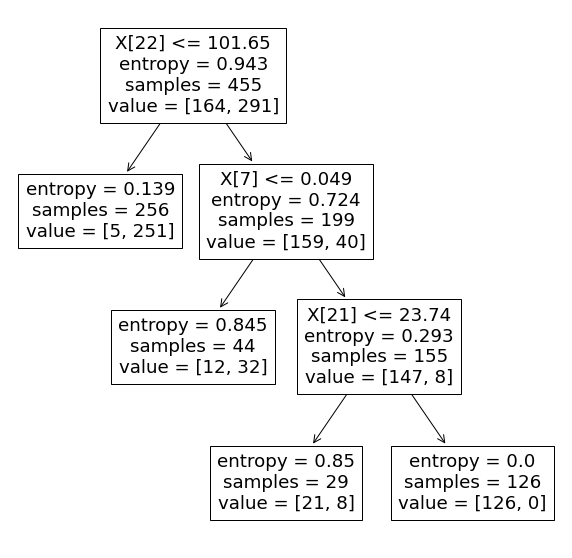

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clt)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clt,out_file = 'tree.dot',class_names=["malignant","benign"],
                feature_names=breast_cancer.feature_names,impurity=False,filled=True)

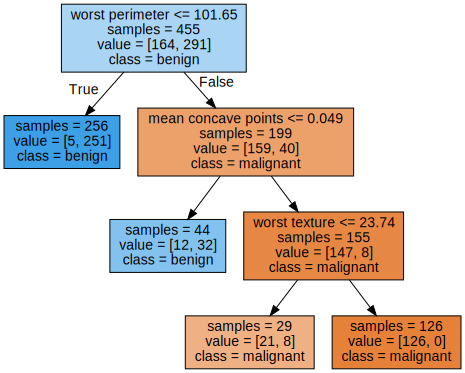

In [ ]:
import graphviz
with open ("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)